In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data.head(3)

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0


In [ ]:
labels = pd.read_csv('labels.csv')

In [ ]:
labels.shape

(801, 1)

In [ ]:
labels.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [ ]:
labels.drop('Unnamed: 0', axis=1, inplace=True)

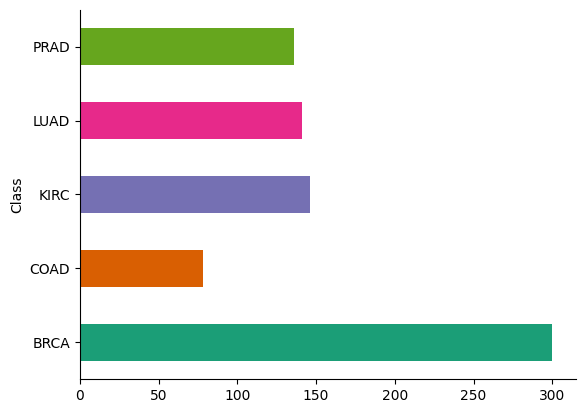

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Assuming labels is your DataFrame with a column named 'Class'
labels.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()


In [ ]:
merged_df = pd.merge(labels,data,on='Unnamed: 0')

In [ ]:
merged_df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
merged_df.head()


,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [ ]:
merged_df.shape

(801, 20532)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
merged_df.drop('Class', axis=1, inplace=True)
X = merged_df.copy()
y = labels.copy()

In [ ]:
X.shape


(801, 20531)

In [ ]:
X.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [ ]:
X.isnull().sum()

gene_0        0
gene_1        0
gene_2        0
gene_3        0
gene_4        0
             ..
gene_20526    0
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Length: 20531, dtype: int64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Columns: 20532 entries, Class to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [ ]:
y.shape

(801, 1)

In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

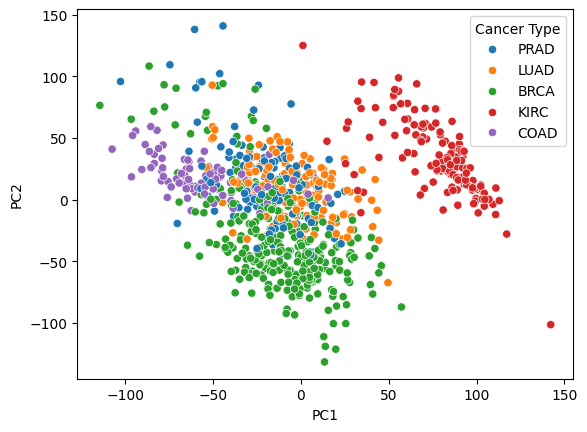

In [ ]:
pca_2 = PCA(n_components=2)  # for 2D visualization
X_pca = pca_2.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Add the cancer type information back into the DataFrame
pca_df['Cancer Type'] = y

# Plot the first two principal components
sns.scatterplot(x='PC1', y='PC2', hue='Cancer Type', data=pca_df)
plt.show()

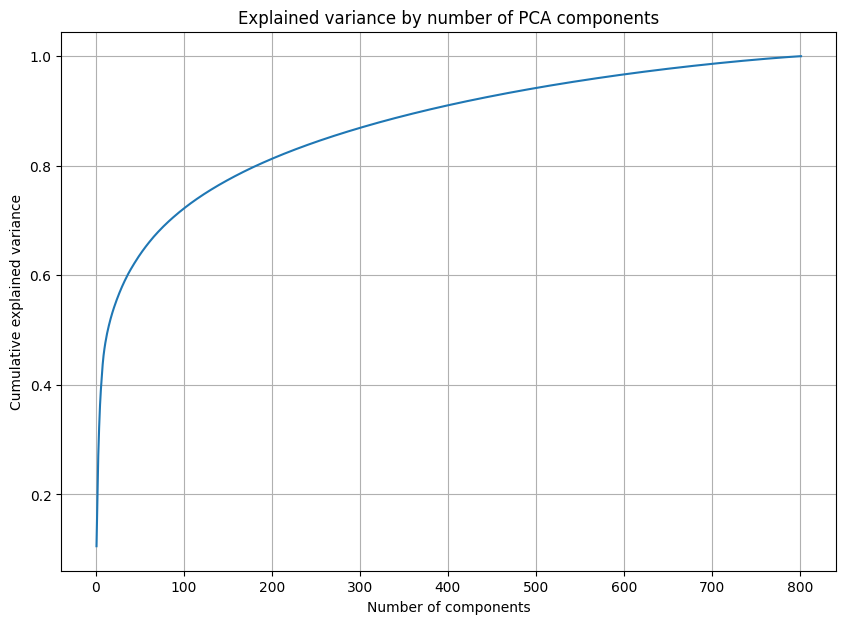

In [ ]:
pca = PCA()
pca.fit(X_scaled)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance by number of PCA components')
plt.grid(True)
plt.show()


In [ ]:
# Try different numbers of PCs around the initial guess and knee point
for n_components in [50, 100 , 150, 200, 250 , 300 , 350 , 400 , 450 , 500 , 550 , 600 , 650 , 700]:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    # Repeat validation and other analyses for each PC set

    # Explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    print(f"{n_components} component :", explained_variance_ratio.sum())  # Check how much variance is captured

50 component : 0.6368023180221788
100 component : 0.7200876545088004
150 component : 0.7717449947687268
200 component : 0.8102865628366988
250 component : 0.8411186196507651
300 component : 0.8667567083579235
350 component : 0.8889095359647335
400 component : 0.9081168709140093
450 component : 0.9251797719500834
500 component : 0.9401823490379896
550 component : 0.9536025974425946
600 component : 0.9654516363668979
650 component : 0.9771345840395655
700 component : 0.9861091207989121


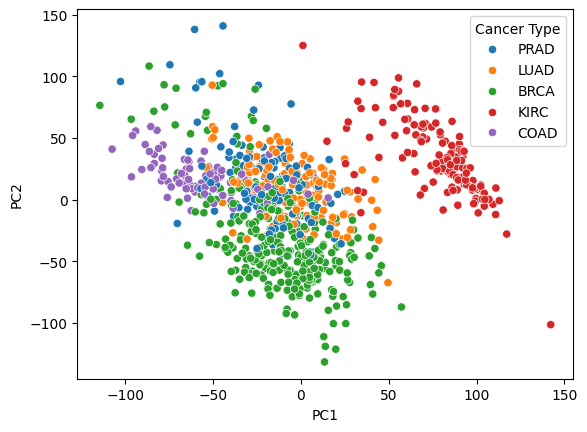

In [ ]:
pca_600 = PCA(n_components=600)
X_pca600 = pca_600.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_600_df = pd.DataFrame(data=X_pca600, columns=[f'PC{i+1}' for i in range(600)])

# Add the cancer type information back into the DataFrame
pca_600_df['Cancer Type'] = y

# Plot the first two principal components
sns.scatterplot(x='PC1', y='PC2', hue='Cancer Type', data=pca_600_df)
plt.show()

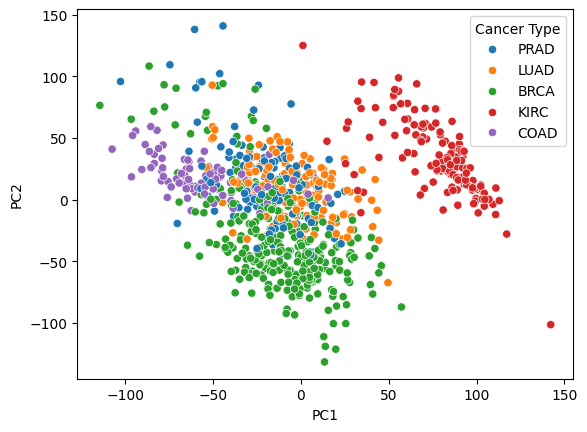

In [ ]:
pca_400 = PCA(n_components=400)
X_pca400 = pca_400.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_400_df = pd.DataFrame(data=X_pca600, columns=[f'PC{i+1}' for i in range(400)])

# Add the cancer type information back into the DataFrame
pca_400_df['Cancer Type'] = y

# Plot the first two principal components
sns.scatterplot(x='PC1', y='PC2', hue='Cancer Type', data=pca_400_df)
plt.show()